In [241]:
# tsv파일 로드
# 1. order_id 컬럼은 숫자의 의미를 가지지 않기 때문에 문자 형태로 데이터를 변환
# 2. 가장 많이 주문한 item_name과 그 수량 출력
# 3. item당 주문 총량 구하고 바형 그래프 출력
# 4. item_price 컬럼은 $금액 > 금액 의 형태로 변환 후  float 형태로 변환
# 5. 주문당 평균 계산 금액 출력
# 6. 각 아이템의 가격을 출력한 후 가격 그래프, 가격 히스토그램 출력
# 7. chicken bowl을 두 개 이상 주문한 고객들의 chicken bowl 메뉴의 총 주문 수량 출력


In [242]:
import pandas as pd
import matplotlib.pyplot as plt

In [243]:
# tsv파일 로드

chipo = pd.read_csv("../csv/num_1/chipotle.tsv",sep="\t")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [244]:
chipo_copy = chipo.copy()


In [245]:
chipo_copy_1 = chipo.copy()

In [246]:
# 1. order_id 컬럼은 숫자의 의미를 가지지 않기 때문에 문자 형태로 데이터를 변환
# astype 이라는 함수를 이용해서 함수 변환

chipo_copy["order_id"] = chipo_copy["order_id"].astype(str)
chipo_copy["order_id"]

0          1
1          1
2          1
3          1
4          2
        ... 
4617    1833
4618    1833
4619    1834
4620    1834
4621    1834
Name: order_id, Length: 4622, dtype: object

In [247]:
# 2. 가장 많이 주문한 item_name과 그 수량 출력
# 그룹화 > sum() > quantity > sort_values > 내림차순 정렬
# top10 출력 > head(10)

chipo_copy.groupby(["item_name"]).sum()["quantity"].sort_values(ascending=False).head(10)



C:\Users\이주노\AppData\Local\Temp\ipykernel_19732\3492317999.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo_copy.groupby(["item_name"]).sum()["quantity"].sort_values(ascending=False).head(10)


item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

In [248]:
#  3. item당 주문 총량 구하고 바형 그래프 출력

total = chipo_copy["item_name"].value_counts()

total


Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [249]:
chipo_copy.groupby("item_name").count()["quantity"].sort_values(ascending=False)

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


Text(0.5, 0, 'item_name')

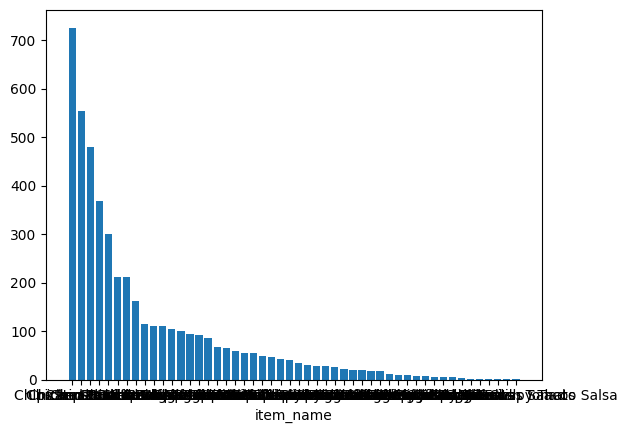

In [250]:
# 3. item당 주문 총량 구하고 바형 그래프 출력

# 그룹화한 데이터르래임을 변수에 저장 > x축과  y축에 어떤한 값이 들어갈지 결정
#  x = index 값 y = values 값 > plt.bar에 삽입

plt.bar(total.index,total)
#  x축 이름 붙이기
plt.xlabel("item_name")


Text(0, 0.5, 'item_name')

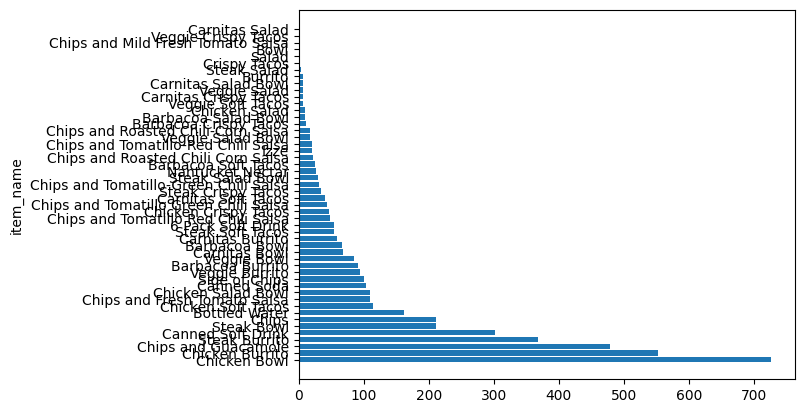

In [251]:
# 옆으로 누운 바형 차트
plt.barh(total.index,total)
plt.ylabel("item_name")

In [252]:
# 4. item_price 컬럼은 $금액 > 금액 의 형태로 변환 후  float 형태로 변환
# itme_price 컬럼의 $를 삭제하고 데이터 형태를 float 형태러 변환


# chipo_copy["item_price"]


# 일반적인 replace함수를 이용해서 삭제
# str은 판다스를 이용한 시리즈나 데이터프레임을 가공하는 경우 사용
# chipo_copy["item_price"].str.replace("$","")



# apply와 replace 함수 이용해서 삭제
# def change(x) :
#     result = x.replace("$","")
#     return result
#  x는 매개변수 result는 지역변수 

# chipo_copy["item_price"].apply(change)



# apply와 lambda 함수 이용해서 삭제
chipo_copy["item_price"] = chipo_copy["item_price"].apply(lambda x: x.replace("$","")).astype(float)


 
# strip를 이용해서 사제 
# chipo_copy["item_price"].str.lstrip("$")

In [253]:
# 5. 주문당 평균 계산 금액 출력
#  그룹화 > 합 > 컬럼 > 평균

chipo_copy.groupby(["order_id"]).sum()["item_price"].mean()

C:\Users\이주노\AppData\Local\Temp\ipykernel_19732\388583349.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo_copy.groupby(["order_id"]).sum()["item_price"].mean()


18.811428571428568

In [254]:
# 6. 각 아이템의 가격을 출력한 후 가격 그래프, 가격 히스토그램 출력

group_data_2 = chipo_copy.groupby(["item_name"]).sum()

C:\Users\이주노\AppData\Local\Temp\ipykernel_19732\3148841147.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data_2 = chipo_copy.groupby(["item_name"]).sum()


In [255]:
# price 라는 새로운 변수 생성

a = group_data_2["item_price"] / group_data_2["quantity"]


In [256]:
# 가장 비싼 매뉴와 가장 싼 메뉴

a.sort_values(ascending=False).head(1)
# a.sort_values().tail(1)

item_name
Steak Salad Bowl    11.083548
dtype: float64

In [257]:
a.sort_values().head(1)
# a.sort_values(ascending=False).tail(1)

item_name
Canned Soda    1.09
dtype: float64

C:\Users\이주노\AppData\Local\Temp\ipykernel_19732\2947266061.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data_2 = chipo_copy.groupby("item_name").sum()


<BarContainer object of 50 artists>

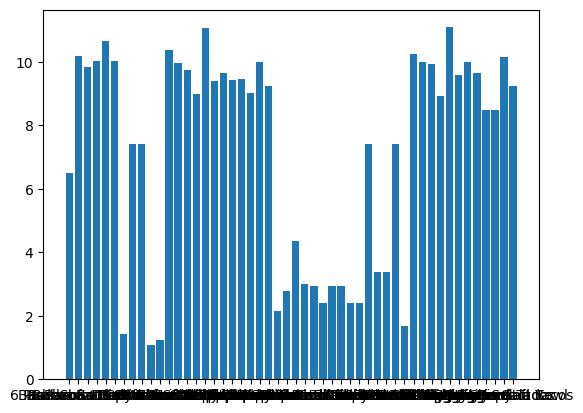

In [258]:
# 아이템당 가격분포 그래프 바형 그래프로 출력

group_data_2 = chipo_copy.groupby("item_name").sum()
item_data = group_data_2['item_price'] / group_data_2['quantity']
plt.bar(item_data.index,item_data)



<BarContainer object of 50 artists>

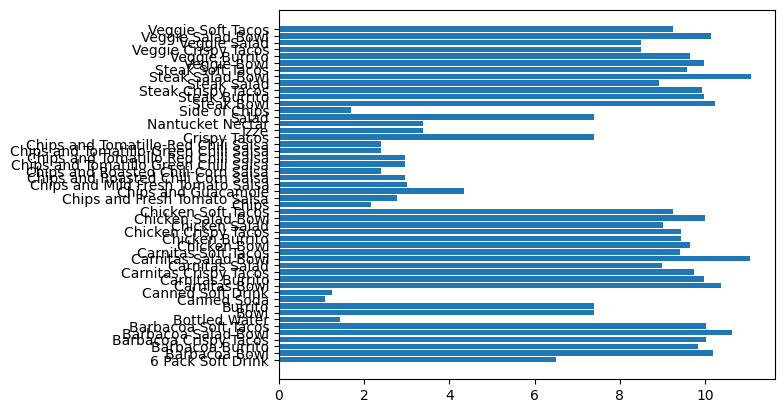

In [259]:
plt.barh(item_data.index,item_data)


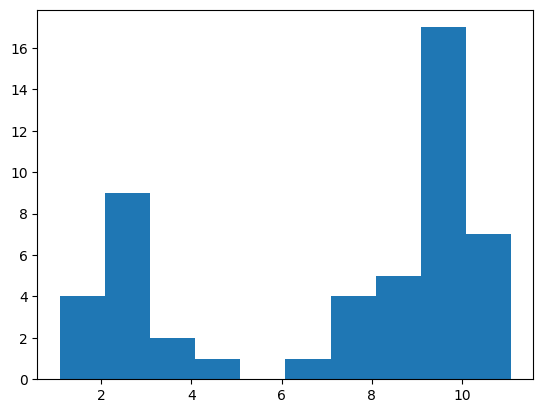

In [260]:
plt.hist(item_data)
plt.show()



In [263]:
# 7. chicken bowl을 두 개 이상 주문한 고객들의 chicken bowl 메뉴의 총 주문 수량 출력
# chicken bowl 두개 이상 주문한 내역

chipo_copy.loc[(chipo_copy["item_name"] == "Chicken Bowl") &


                (chipo_copy["quantity"] >= 2)].sum()["quantity"]

68